In [117]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [118]:
df30 = np.concatenate((np.ones((100,1)),pd.read_csv("../data/UCLA_EE_grad_2030.csv",header=None).to_numpy()), axis=1)
df31 = np.concatenate((np.ones((100,1)),pd.read_csv("../data/UCLA_EE_grad_2031.csv",header=None).to_numpy()), axis=1)

Problem 1 - Kernelised perceptron algorithm

In [197]:
df = df30
X = df[:,:3]
Y = df[:,3]
N = 100
m = 3

In [208]:
def no_kernel(u, x):
    return np.dot(u,x)
def poly_kernel(u, x):
    return (1 + np.dot(u,x)) ** 2
def gauss_kernel(u, x, sigma=3):
    return np.exp(-sigma*(np.linalg.norm(u-x) ** 2))

In [209]:
def kperceptron_predict(x, a, kernel=no_kernel):
    total = 0
    for example in range(0,N):
        total += a[example] * Y[example] * kernel(X[example], x)
    return np.sign(total)

In [210]:
def kperceptron_train(X, max_iter=1000, kernel=no_kernel):
    a = np.zeros(N)
    for epoch in range(0, max_iter):
        for example in range(0, N):
            x = X[example]
            y = Y[example]
            pred = kperceptron_predict(x, a, kernel)
            if (y != pred):
                a[example] += 1
    return a

In [212]:
a1 = kperceptron_train(X, kernel=no_kernel)
a2 = kperceptron_train(X, kernel=poly_kernel)
a3 = kperceptron_train(X, kernel=gauss_kernel)

KeyboardInterrupt: 

In [213]:
a4 = kperceptron_train(X, kernel=gauss_kernel)

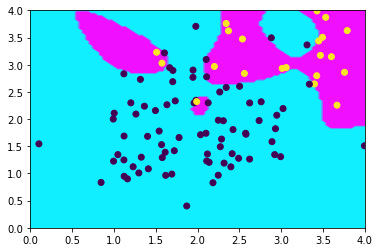

In [214]:
ticks = 100
rng = np.linspace(0,4,ticks)
gpa, gre = np.meshgrid(rng, rng)
Z = np.zeros((ticks, ticks))
for i, u in enumerate(rng):
    for j, v in enumerate(rng):
        x = np.array([1, u,v])
        Z[i,j] = kperceptron_predict(x, a4, gauss_kernel)
plt.contourf(gpa, gre, Z, cmap='cool')
plt.scatter(X[:,2], X[:,1], c=Y)
plt.savefig("1div.png")

In [186]:
def training_accuracy(a, kernel):
    misclassified = 0
    for i in range(0,N):
        x = X[i]
        y = Y[i]
        pred = kperceptron_predict(x, a, kernel)
        if (y != pred):
            misclassified += 1
    return (N-misclassified)/N

In [203]:
acc1 = training_accuracy(a1, no_kernel)
acc2 = training_accuracy(a2, poly_kernel)
acc3 = training_accuracy(a3, gauss_kernel)

Problem 3